# WPROWADZENIE

**Źródło danych:** 
https://www.kaggle.com/maricinnamon/harry-potter-movies-dataset-starter-notebook/data

**Wykorzystane pliki z setu:** 
* Characters.csv
Jest to zbiór wszystkich postaci występujących w serii filmów o Harrym Poterze.

**Tezy do sprawdzenia:**
1. Ile postaci posiada to samo nazwisko? 
    * Które 5 nazwisk występuje najczęściej?
    * Ile nazwisk występuje tylko raz?
    * Czy to, że nie ma więcej osób o tym nazwisku oznacza, że były to drugoplanowe role? (potrzebny zbiór Dialogue.csv)
2. Czy w serii o HP występuje parytet? 
    * Ile procent postaci to kobiety?
    * Ile procent postaci to mężczyźni?
3. Ile procent postaci należy do:
    * Grifindor'u
    * Slytherin'u
    * Ravenclaw'u
    * Hufflepuff'u
4. Ile jest postaci o gatunku inny niż człowiek w serii o HP?
    * jaki procent innych gatunków stanowią poszczególne inne gatunki?
    * ile jest duchów?
    * czy każdy dom ma swojego ducha?
5. Ile postaci ma swojego patronusa?
    * czy któryś patronus się powtarza?


## PRZYGOTOWANIE IMPORTÓW I SPRAWDZENIE DANYCH:

In [97]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df = pd.read_csv('Harry_Potter_Movies\Characters.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 10.5+ KB


In [99]:
df.sample(7)

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
139,140,Woman,NaN,NaN,NaN,NaN,NaN,NaN
123,124,Marcus Belby,Human,Male,Ravenclaw,NaN,NaN,NaN
117,118,Ernest Macmillan,Human,Male,Hufflepuff,Boar,NaN,NaN
63,64,Bogrod,Goblin,Male,NaN,NaN,NaN,NaN
50,51,Rufus Scrimgeour,Human,Male,NaN,NaN,NaN,NaN
102,103,Magorian,Centaur,Male,NaN,NaN,NaN,NaN
108,109,Justin Finch-Fletchley,Human,Male,Hufflepuff,NaN,NaN,NaN


In [100]:
df.isnull().sum()

Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

## WNIOSKI PO WSTĘPNYM SPRAWDZENIU DANYCH:

* Zbiór posiada 166 postaci o unikalnym ID postaci
* Najwięcej informacji brakuje o rożdzkach i patronusach

# ANALIZA

## Ile postaci posiada to samo nazwisko? 

Aby sprawdzić to założenie należy najpierw wybrać z całego zbioru postacie z gatunku Człowiek i usunąć pozycję w których nie ma określonej płci. Z tego co sprawdziłam w takich wypadkach, są to postacie określane jako np. Studenci, Dziewczyny itp. więc dla tych rekordów i tak nie uda nam się wyodrębnić nazwisk.

In [101]:
# wybranie tylko postaci z gatunku Człowiek:
only_human_name = {'Name_and_Surname': df['Character Name'], 'Species': df['Species']};
df__human_name = pd.DataFrame(only_human_name)
df__human_name[df__human_name['Species'].isin(['Human'])]
df__human_name.dropna(axis='index', inplace=True)
df__human_name.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name_and_Surname  125 non-null    object
 1   Species           125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


Otrzymałam listy 125 postaci, które na pewno są ludźmi.  
Kolumnę "Charakter Name" rozdzielę na dwie kolumny: "Name" i "Surname". Separatorem w tym wypadku będzie spacja. 

In [102]:
# rozdzielanie imienia i nazwiska na dwie kolumny:

only_charakter_name = {'Name_and_Surname': df__human_name['Name_and_Surname']};
temp_list = pd.DataFrame(only_charakter_name)
split_list = pd.DataFrame(temp_list['Name_and_Surname'].str.split(" ", expand=True))
split_list.rename(columns={0: 'name', 1: 'surname'}, inplace=True)
split_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     125 non-null    object
 1   surname  107 non-null    object
 2   2        4 non-null      object
dtypes: object(3)
memory usage: 3.9+ KB


Z listy 125 postaci gatunku Człowiek otrzymałam 107 nazwisk. Dodatkowo mam 4 rekordy, które miały jeszcze teskt po nazwisku. Sprawdzę co jest w tej kolumnie.

In [103]:
split_list[2].unique()

array([None, 'Sr.', 'Nick', 'Slitherin', 'Jr.'], dtype=object)

Jak widać powyżej informacje w tej kolumnie są bezużyteczne, dlatego usuwam całą kolumnę.

In [104]:
del split_list[2]
del split_list['name']
split_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surname  107 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


Skoro już mamy wyczyszczone dane, czas na właściwą zabawę z danymi.
Utworzę tabelę z samymi nazwiskami na której sprawdzę:
* jakie nazwiska są w top 5 najczęściej występujących nazwisk
* ile nazwisk występuje tylko raz?

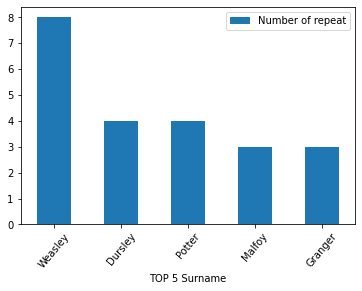

In [141]:
surname = split_list['surname'].value_counts()
top_five = pd.DataFrame({'TOP 5 Surname': ['Weasley', 'Dursley', 'Potter', 'Malfoy', 'Granger'], 
                        'Number of repeat': [8, 4, 4, 3, 3]}, 
                        index=None)
plot = top_five.plot.bar(x='TOP 5 Surname', y='Number of repeat', rot=50)


## Czy w serii o HP występuje parytet?

Na początek sprawdzam jakie i w jakiej ilości występują wartości w kolumnie 'Gender' czyli płeć.

In [106]:
df['Gender'].value_counts()

Male      82
Female    42
Human      1
Name: Gender, dtype: int64

Pojawia się niespodzianka w postaci płci "Human". Występuje tylko jeden raz więc może to być błąd. Sprawdzam to szukając w kolumnie 'Gender' łańcucha znaków 'Human'.

In [107]:
df[df['Gender'].isin(['Human'])]

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
46,47,Nearly Headless Nick,Ghost,Human,Gryffindor,NaN,NaN,NaN


Na 46 pozycji pojawia się Prawiebezgłowy Nick, który jest duchem Gryffindoru. 
Ewidentnie wkradł się błąd, ponieważ ta postać powinna zostać sklasyfikowana jako mężczyzna. 
Naprawię to jedną linijką kodu.

In [108]:
df['Gender'].replace('Human', 'Male', inplace=True)
df.iloc[46:47,:]

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
46,47,Nearly Headless Nick,Ghost,Male,Gryffindor,NaN,NaN,NaN


In [109]:
df['Gender'].value_counts()

Male      83
Female    42
Name: Gender, dtype: int64

Po zmianie widać, że w tabeli są tylko dwa rodzaje płci Kobieta (Female) i Mężczyzna (Male). Na pierwszy rzut oka widać, że kobiet jest dwa razy mniej niż mężczyzn. Co potwierdza poniższy wykres.

Text(0.5, 1.0, 'Płeć postaci w serii Harry Potter')

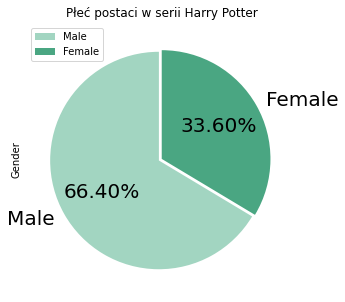

In [110]:
gender = df['Gender'].value_counts();

plot = gender.plot.pie(
    figsize=(5,5), 
    legend=True, 
    fontsize=20,
    colors=['#a2d5c1', '#4aa682'],
    autopct = '%1.2f%%',
    explode=(0.030,0),
    startangle = 90,
    );
plt.title('Płeć postaci w serii Harry Potter')

## Ile procent postaci należy do konkretnego Domu?

## Ile jest postaci o gatunku inny niż człowiek w serii o HP?